In [74]:
# Importer les librairies
import os
import numpy as np
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt  # Importation de Matplotlib
import pandas as pd

import scipy
import json
from matplotlib import style


In [155]:
# Chemins vers les dossiers
original_train_dir = '../data/gtsrb_original/Images'
new_train_dir = '../data/gtsrb_split/Images_Train'
new_test_dir = '../data/gtsrb_split/Images_Test'

# Paramètres
IMG_SIZE = (64, 64)
NUM_CLASSES = 43

classes_label = { 0:'Limite de vitesse (20km/h)',
            1:'Limite de vitesse (30km/h)', 
            2:'Limite de vitesse (50km/h)', 
            3:'Limite de vitesse (60km/h)', 
            4:'Limite de vitesse (70km/h)', 
            5:'Limite de vitesse (80km/h)', 
            6:'Fin de limite de vitesse (80km/h)', 
            7:'Limite de vitesse (100km/h)', 
            8:'Limite de vitesse (120km/h)', 
            9:'Dépassement interdit', 
            10:'Dépassement interdit pour les véhicules de plus de 3.5 tonnes', 
            11:'Priorité à droite', 
            12:'Route prioritaire', 
            13:'Cédez le passage', 
            14:'Stop', 
            15:'Interdiction de circuler (tous véhicules)', 
            16:'Interdiction de circuler (véhicules de plus de 3.5 tonnes)', 
            17:'Entrée interdite', 
            18:'Attention', 
            19:'Virage dangereux à gauche', 
            20:'Virage dangereux à droite', 
            21:'Succession de virages', 
            22:'Route glissante', 
            23:'Chaussée glissante (danger)', 
            24:'Rétrécissement de la chaussée à droite', 
            25:'Travaux', 
            26:'Feux de signalisation', 
            27:'Passage piétons', 
            28:'Passage d\'enfants', 
            29:'Passage de cyclistes', 
            30:'Attention, risque de verglas', 
            31:'Passage d\'animaux sauvages', 
            32:'Fin de limitation de vitesse et de dépassement', 
            33:'Tourner à droite', 
            34:'Tourner à gauche', 
            35:'Tout droit', 
            36:'Tout droit ou tourner à droite', 
            37:'Tout droit ou tourner à gauche', 
            38:'Obligation d\'aller à droite', 
            39:'Obligation d\'aller à gauche', 
            40:'Circulation obligatoire sur la voie des rond-points', 
            41:'Fin d\'interdiction de dépasser', 
            42:'Fin d\'interdiction de dépasser pour les véhicules de plus de 3.5 tonnes' }

# Créer les dossiers s'ils n'existent pas déjà
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)


\begin{table}[h]
\centering
\begin{tabular}{|c|l|}
\hline
\textbf{Valeur de classe} & \textbf{Nom de catégorie} \\
\hline
0 & Limite de vitesse (20km/h) \\
\hline
1 & Limite de vitesse (30km/h) \\
\hline
2 & Limite de vitesse (50km/h) \\
\hline
3 & Limite de vitesse (60km/h) \\
\hline
4 & Limite de vitesse (70km/h) \\
\hline
5 & Limite de vitesse (80km/h) \\
\hline
6 & Fin de limite de vitesse (80km/h) \\
\hline
7 & Limite de vitesse (100km/h) \\
\hline
8 & Limite de vitesse (120km/h) \\
\hline
9 & Dépassement interdit \\
\hline
10 & Dépassement interdit pour les véhicules de plus de 3.5 tonnes \\
\hline
11 & Priorité à droite \\
\hline
12 & Route prioritaire \\
\hline
13 & Cédez le passage \\
\hline
14 & Stop \\
\hline
15 & Interdiction de circuler (tous véhicules) \\
\hline
16 & Interdiction de circuler (véhicules de plus de 3.5 tonnes) \\
\hline
17 & Entrée interdite \\
\hline
18 & Attention \\
\hline
19 & Virage dangereux à gauche \\
\hline
20 & Virage dangereux à droite \\
\hline


In [76]:
import shutil

# Obtenir la liste des classes
classes = [d for d in os.listdir(original_train_dir) if os.path.isdir(os.path.join(original_train_dir, d))]

# Proportion de l'ensemble de validation
proportion_validation = 0.2

# Diviser les images pour chaque classe
for classe in classes:
    print(f'Séparation de la classe {classe}')
    # Chemins pour chaque classe
    chemin_classe_source = os.path.join(original_train_dir, classe)
    chemin_classe_entrainement = os.path.join(new_train_dir, classe)
    chemin_classe_validation = os.path.join(new_test_dir, classe)

    # Créer des dossiers pour chaque classe dans les ensembles d'entraînement et de validation
    os.makedirs(chemin_classe_entrainement, exist_ok=True)
    os.makedirs(chemin_classe_validation, exist_ok=True)

    # Obtenir une liste de toutes les images dans le dossier de classe
    images = os.listdir(chemin_classe_source)
    np.random.shuffle(images)  # Mélanger aléatoirement les images

    # Point de séparation pour la validation
    point_separation = int(len(images) * proportion_validation)

    # Séparer les images
    for i, img in enumerate(images):
        if i < point_separation:
            shutil.copy(os.path.join(chemin_classe_source, img), chemin_classe_validation)
        else:
            shutil.copy(os.path.join(chemin_classe_source, img), chemin_classe_entrainement)
print(f'Images copied to {new_train_dir} for training and {new_test_dir} for testing.')

Séparation de la classe 00000
Séparation de la classe 00001
Séparation de la classe 00002
Séparation de la classe 00003
Séparation de la classe 00004
Séparation de la classe 00005
Séparation de la classe 00006
Séparation de la classe 00007
Séparation de la classe 00008
Séparation de la classe 00009
Séparation de la classe 00010
Séparation de la classe 00011
Séparation de la classe 00012
Séparation de la classe 00013
Séparation de la classe 00014
Séparation de la classe 00015
Séparation de la classe 00016
Séparation de la classe 00017
Séparation de la classe 00018
Séparation de la classe 00019
Séparation de la classe 00020
Séparation de la classe 00021
Séparation de la classe 00022
Séparation de la classe 00023
Séparation de la classe 00024
Séparation de la classe 00025
Séparation de la classe 00026
Séparation de la classe 00027
Séparation de la classe 00028
Séparation de la classe 00029
Séparation de la classe 00030
Séparation de la classe 00031
Séparation de la classe 00032
Séparation

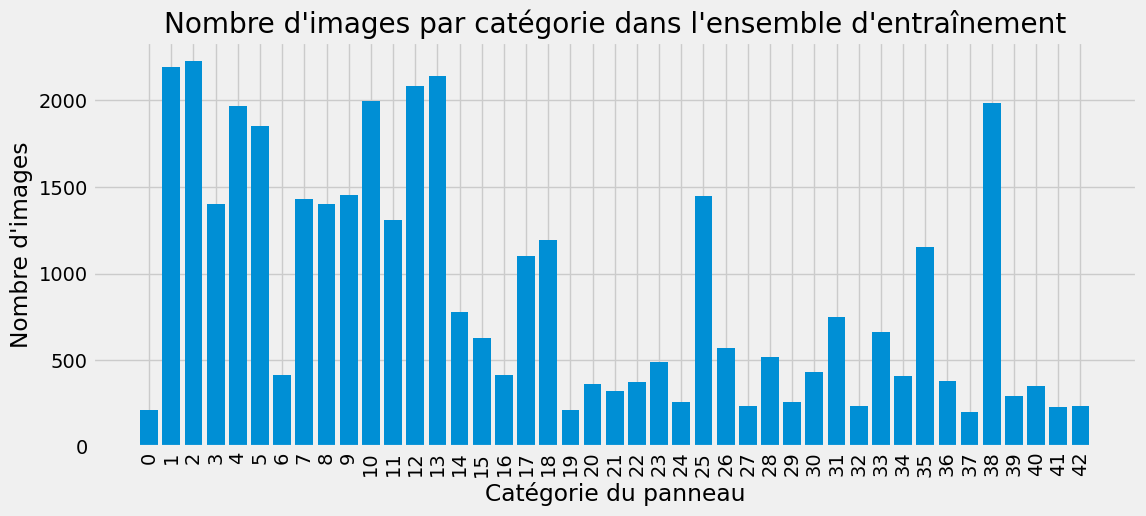

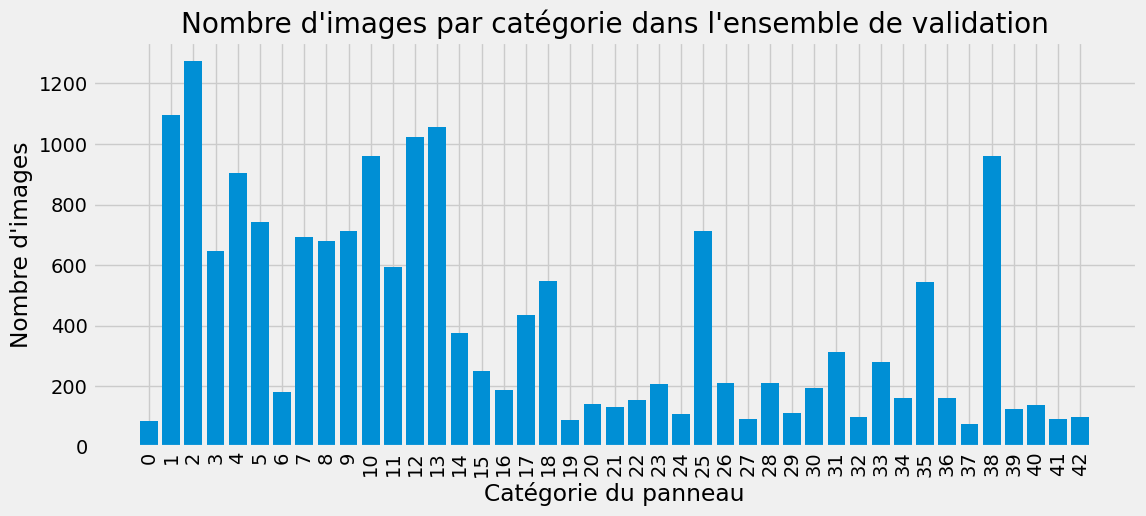

In [154]:
# Obtenir la liste des classes
classes = [d for d in os.listdir(original_train_dir) if os.path.isdir(os.path.join(original_train_dir, d))]

# Compter le nombre d'images pour chaque classe dans l'ensemble d'entraînement et de validation
train_counts = {}
test_counts = {}

for classe in classes:
    chemin_classe_entrainement = os.path.join(new_train_dir, classe)
    chemin_classe_validation = os.path.join(new_test_dir, classe)
    train_counts[classe] = len(os.listdir(chemin_classe_entrainement))
    test_counts[classe] = len(os.listdir(chemin_classe_validation))

# Trier les dictionnaires par nombre d'images
train_counts_sorted = dict(sorted(train_counts.items(), key=lambda item: item[1]))
test_counts_sorted = dict(sorted(test_counts.items(), key=lambda item: item[1]))

# Convertir les clés de train_counts_sorted en entiers
train_counts_sorted_int_keys = {int(key): value for key, value in train_counts_sorted.items()}

# Obtenez les noms des classes dans l'ordre trié
class_names = [classes_label[class_num] for class_num in train_counts_sorted_int_keys.keys()]
class_numbers = list(train_counts_sorted_int_keys.keys())

# Graphique pour l'ensemble d'entraînement avec les noms de classe
plt.figure(figsize=(12,5))
plt.bar(class_numbers, train_counts_sorted_int_keys.values())
plt.title('Nombre d\'images par catégorie dans l\'ensemble d\'entraînement')
plt.xlabel('Catégorie du panneau')
plt.ylabel('Nombre d\'images')
plt.xticks(class_numbers, rotation='vertical')
plt.show()

# Obtenez les noms des classes dans l'ordre trié pour l'ensemble de validation
test_counts_sorted_int_keys = {int(key): value for key, value in test_counts_sorted.items()}
class_names_test = [classes_label[class_num] for class_num in test_counts_sorted_int_keys.keys()]

# Graphique pour l'ensemble de validation avec les noms de classe
plt.figure(figsize=(12,5))
plt.bar(class_numbers, test_counts_sorted_int_keys.values())
plt.title('Nombre d\'images par catégorie dans l\'ensemble de validation')
plt.xlabel('Catégorie du panneau')
plt.ylabel('Nombre d\'images')
plt.xticks(class_numbers, rotation='vertical')
plt.show()



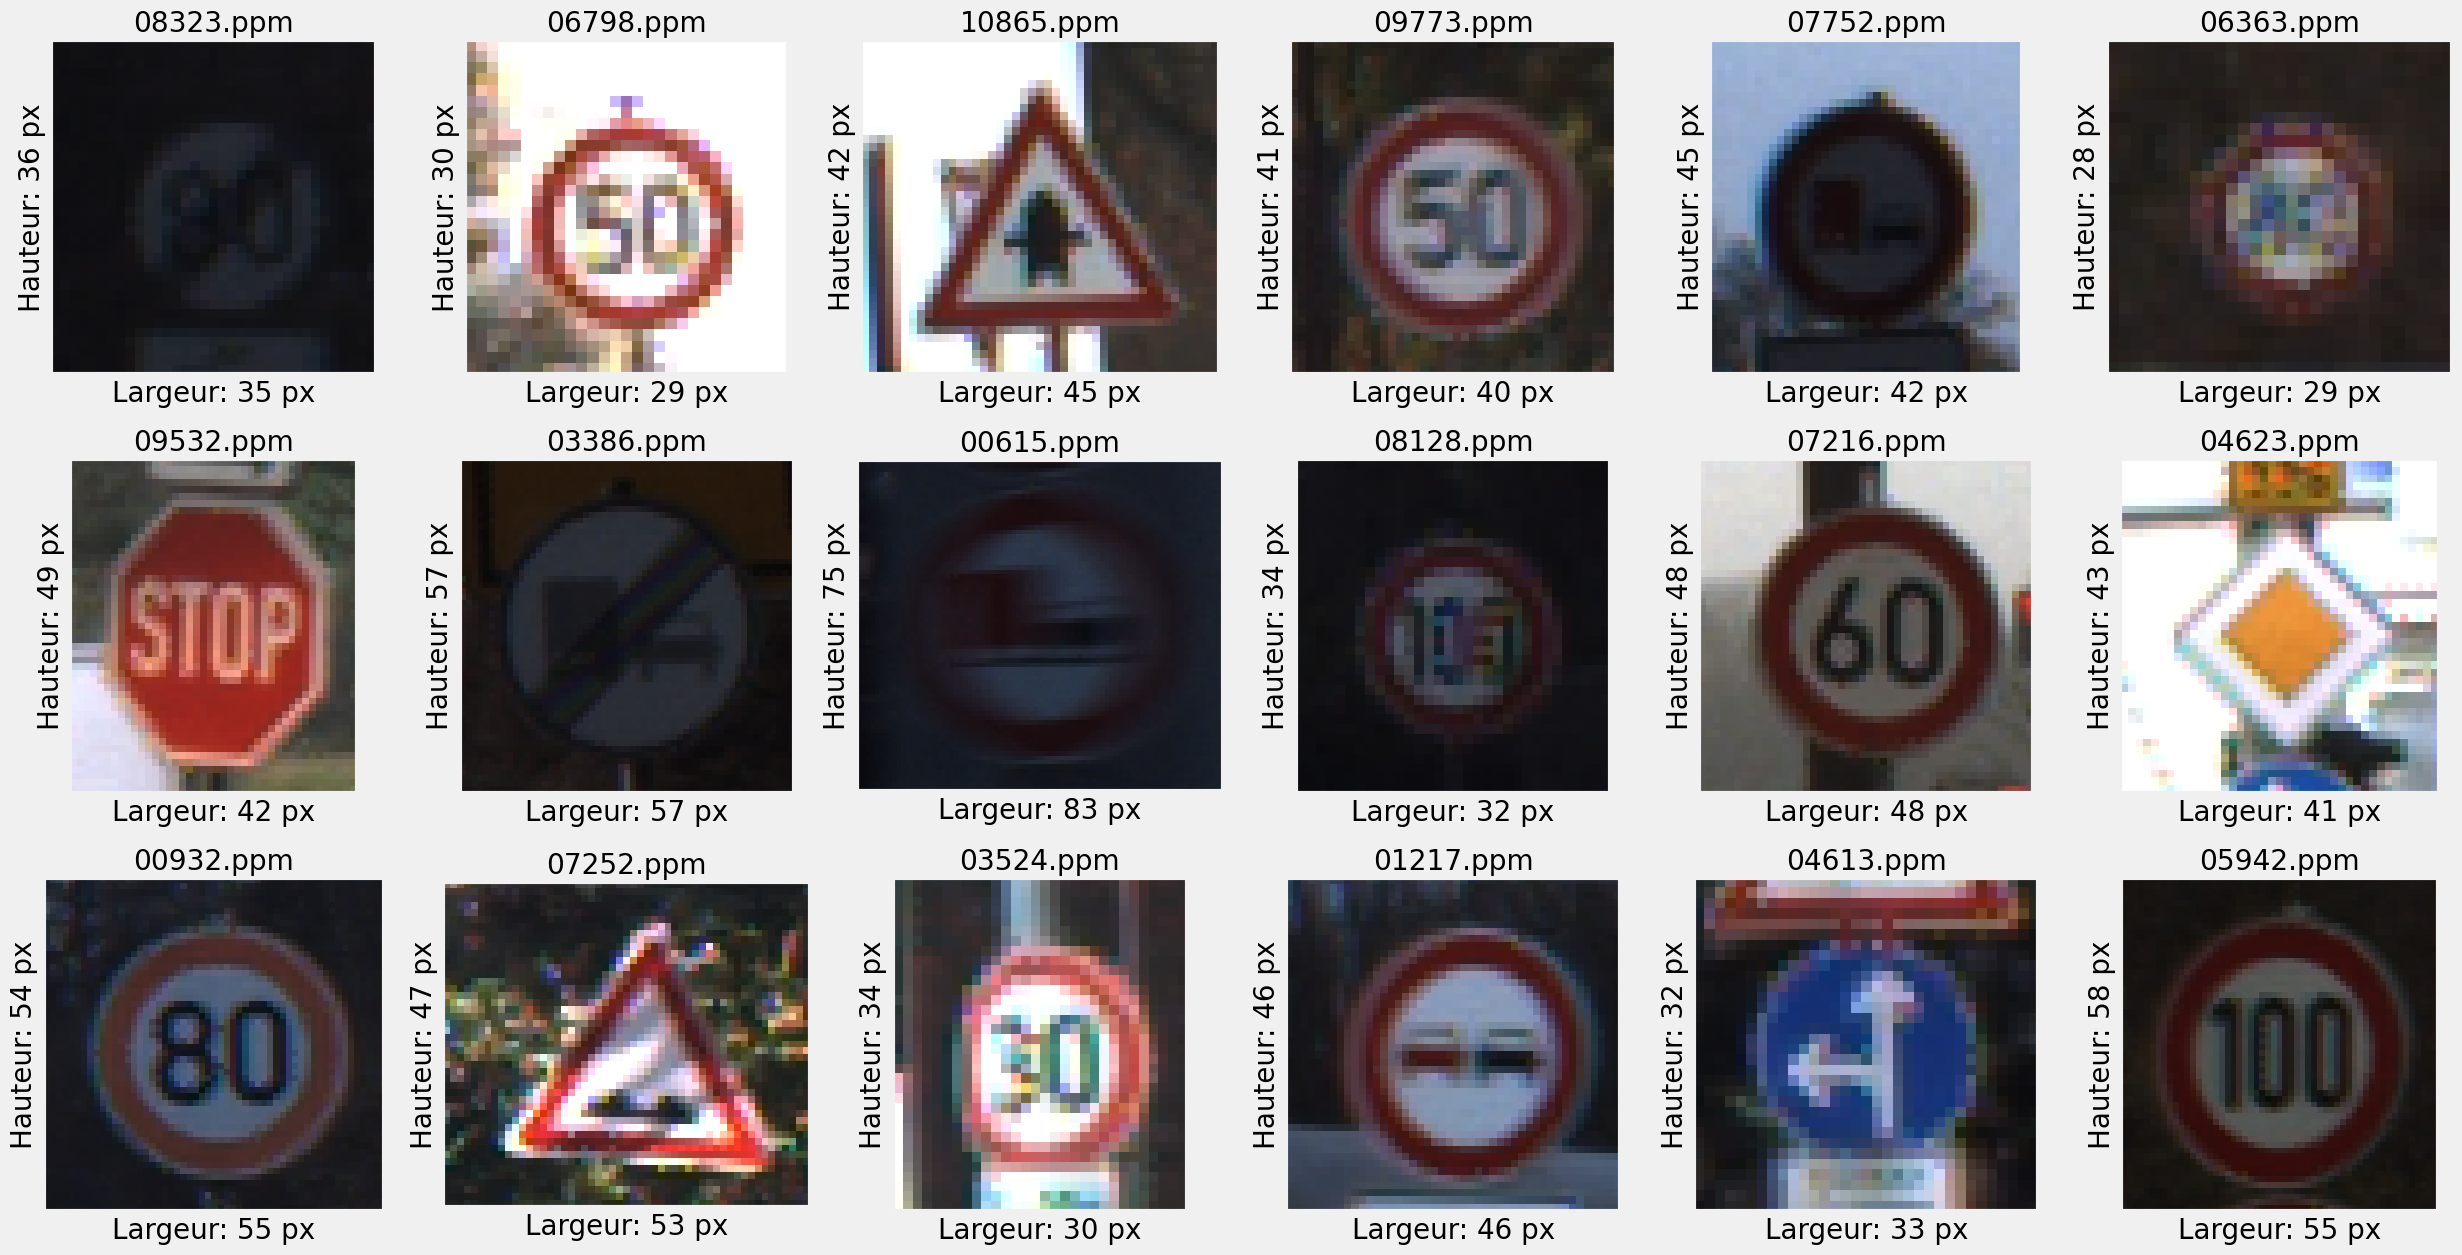

In [78]:
import random
from matplotlib.image import imread
data_test_dir = '../data/Final_Test/Images'
test = pd.read_csv(data_test_dir + '/GT-final_test.test.csv', delimiter=';')
imgs = test["Filename"].values


plt.figure(figsize=(25, 25))

for i in range(1, 19):
    plt.subplot(6,6, i)
    random_img_name = random.choice(imgs)
    random_img_path = f'{data_test_dir}/{random_img_name}'
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(False) 
    plt.title(random_img_name)
    plt.xlabel(f"Largeur: {rand_img.shape[1]} px", fontsize=20) 
    plt.ylabel(f"Hauteur: {rand_img.shape[0]} px", fontsize=20)
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

In [79]:
# Construction d'un modèle CNN plus sophistiqué
print(f'Construction du modèle CNN en cours.')
model = models.Sequential([
    layers.Input(shape=(*IMG_SIZE, 3)),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(axis=-1),

    
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(axis=-1),
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compilation du modèle
print(f'Compilation du modèle CNN en cours.')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(f'Compilation terminée.')

Construction du modèle CNN en cours.
Compilation du modèle CNN en cours.
Compilation terminée.


Génération des données pour l'entraînement
Génération des données pour la validation.
Found 38508 images belonging to 43 classes.
Found 17819 images belonging to 43 classes.


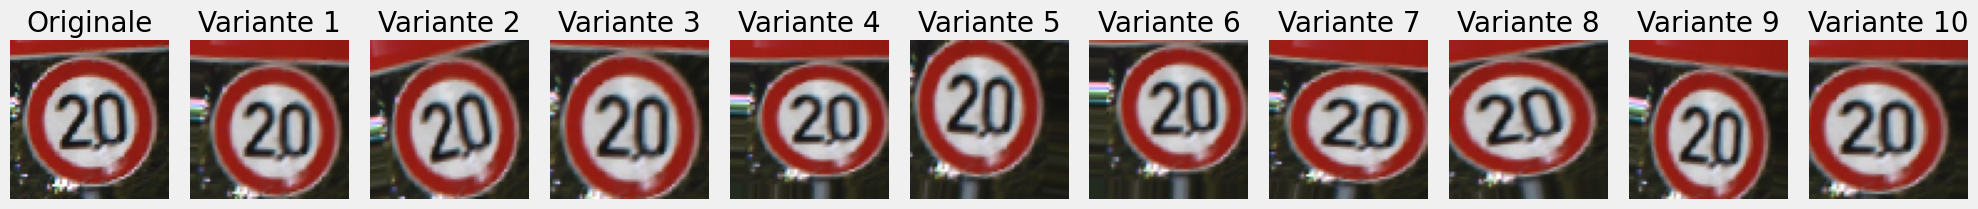

In [156]:
# Préparation des générateurs de données pour l'entraînement et la validation avec augmentation des données
print(f'Génération des données pour l\'entraînement')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=False,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Générateurs
print(f'Génération des données pour la validation.')
train_generator = train_datagen.flow_from_directory(
    new_train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    new_test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical')


import os
import numpy as np
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt

# Définir le chemin du dossier contenant les images
image_dir = '../data/gtsrb_split/Images_Train/00000'

# Liste tous les fichiers dans le dossier et filtre les fichiers image
image_files = [f for f in os.listdir(image_dir) if f.endswith('.ppm')]

# Choisir un fichier image aléatoire
random_image_file = random.choice(image_files)
random_image_path = os.path.join(image_dir, random_image_file)

# Charger l'image
img = load_img(random_image_path, target_size=(64, 64)) 
img_array = img_to_array(img)  
img_array = np.expand_dims(img_array, axis=0)  

# Configuration du générateur avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Générer des lots d'images augmentées
it = train_datagen.flow(img_array, batch_size=1)

# Afficher l'image originale et les images augmentées
plt.figure(figsize=(20, 4))
plt.subplot(1, 11, 1)
plt.imshow(np.uint8(img_array[0]))  
plt.title("Original")
plt.axis('off')

for i in range(10):
    plt.subplot(1, 11, i+2)
    batch = next(it) 
    img_aug = batch[0]  
    plt.imshow(np.uint8(img_aug * 255))  
    plt.title("Variante " + str(i+1))
    plt.axis('off')
plt.tight_layout()
plt.show()



In [81]:
# Callbacks pour améliorer l'entraînement
checkpoint_cb = ModelCheckpoint('../data/model/traffic_sign_model.keras', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)


# Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Sauvegarder l'historique sous forme de JSON
history_path = '../data/json/training_history_V1.json'
with open(history_path, 'w') as f:
    json.dump(history.history, f)
print(f"L'historique d'entraînement a été sauvegardé à {history_path}.")

# Évaluation du modèle
eval_result = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {eval_result[0]} - Validation accuracy: {eval_result[1]}')


Epoch 1/30


F:\projet_tutore_zouhair_abadie_abecassis\projet_tutore_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 959s 793ms/step - accuracy: 0.5812 - loss: 1.7804 - val_accuracy: 0.9734 - val_loss: 0.0864
Epoch 2/30
   1/1203 ━━━━━━━━━━━━━━━━━━━━ 11:22 568ms/step - accuracy: 0.9688 - loss: 0.1311

C:\Users\guigu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9688 - loss: 0.1311 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 3/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 721s 599ms/step - accuracy: 0.9680 - loss: 0.1062 - val_accuracy: 0.9893 - val_loss: 0.0314
Epoch 4/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 95us/step - accuracy: 0.9375 - loss: 0.1822 - val_accuracy: 0.9259 - val_loss: 0.0977
Epoch 5/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 722s 600ms/step - accuracy: 0.9784 - loss: 0.0685 - val_accuracy: 0.9969 - val_loss: 0.0092
Epoch 6/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 8.4528e-04 - val_accuracy: 1.0000 - val_loss: 5.9389e-04
Epoch 7/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 723s 601ms/step - accuracy: 0.9830 - loss: 0.0559 - val_accuracy: 0.9960 - val_loss: 0.0129
Epoch 8/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9688 - loss: 0.2507 - val_accuracy: 1.0000 - val_loss: 5.3973e-04
Epoch 9/30
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 792s 658ms/step - accuracy: 0.9782

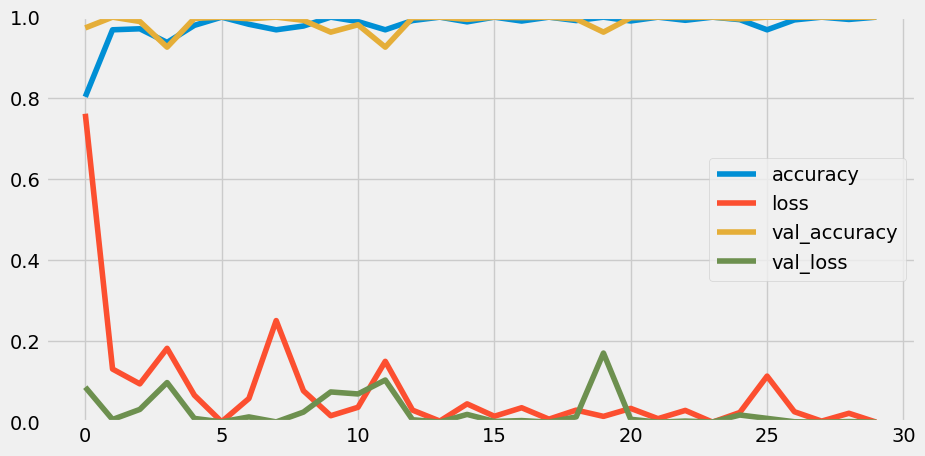

In [82]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Prédiction : Entrée interdite


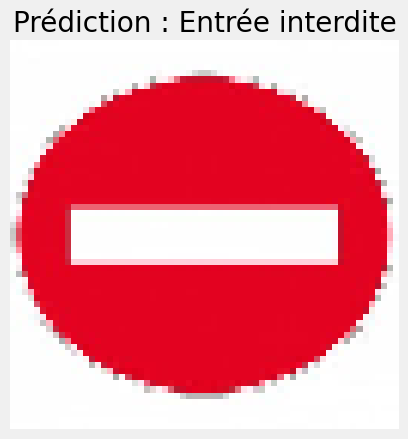

In [117]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

# Définir la taille de l'image attendue par le modèle
IMG_SIZE = (64, 64) 

# Chemin vers le modèle pré-entraîné et l'image à tester
model_path = '../data/model/traffic_sign_model.keras'
img_path = '../data/test_image_png/img.jpg'

# Charger l'image avec la taille attendue par le modèle
img = load_img(img_path, target_size=IMG_SIZE)


# Convertir l'image en tableau numpy
img_array = img_to_array(img)

# Normaliser l'image comme cela a été fait pour les données d'entraînement
img_array = img_array / 255.0

# Ajouter une dimension pour créer un lot d'une seule image
img_array = np.expand_dims(img_array, axis=0)

# Charger le modèle pré-entraîné
model = load_model(model_path)

# Faire la prédiction
predictions = model.predict(img_array)

# Identifier la classe prédite
predicted_class = np.argmax(predictions, axis=1)

# Afficher la classe prédite
print(f'Prédiction : {classes_label[predicted_class[0]]}')

# Afficher l'image chargée
plt.imshow(img)
plt.title(f'Prédiction : {classes_label[predicted_class[0]]}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


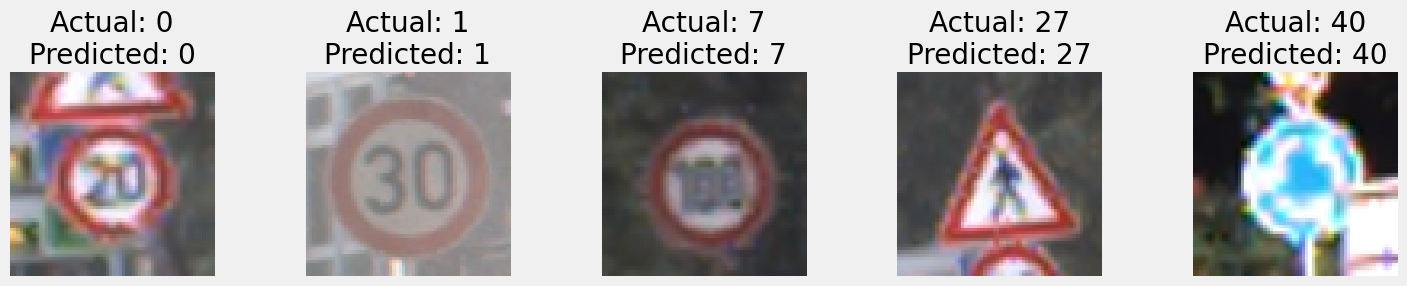

In [107]:

# Charger les images et préparer les données
test = pd.read_csv('../data/Final_Test/Images/image_csv.csv', delimiter=';')
labels = test["ClassId"].values
imgs = test["Filename"].values
data = []

for img in imgs:
    try:
        image = cv2.imread('../data/Final_Test/Images/' + img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        image_fromarray = Image.fromarray(image)
        resize_image = image_fromarray.resize((64, 64))
        data.append(np.array(resize_image))
    except Exception as e:
        print("Error in " + img + ": " + str(e))

X_test = np.array(data) / 255.0

# Charger le modèle et prédire
model = load_model('../data/model/traffic_sign_model.keras')
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Affichage des images sur une seule ligne
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))  

for i, (image, label, prediction) in enumerate(zip(data, labels, predicted_classes)):
    ax = axes[i]
    ax.imshow(image)
    ax.set_title(f'Actual: {label}\nPredicted: {prediction}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)